# Softmax exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

This exercise is analogous to the SVM exercise. You will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights


In [37]:
import os
os.getcwd()

'C:\\Users\\ManicBird\\Dropbox\\CS231n\\CS231n\\assignment1'

In [3]:
import os
cs231n_dir = ['/home/manicbird/Dropbox/Python/CS231n/CS231n/assignment1',
               'D:/Dropbox/Python/CS231n/CS231n/assignment1',
               'C:/Users/ManicBird/Dropbox/CS231n/CS231n/assignment1']
for dr in cs231n_dir:
    if os.path.isdir(dr):
        os.chdir(dr)
        break

os.getcwd()

'C:\\Users\\ManicBird\\Dropbox\\CS231n\\CS231n\\assignment1'

In [5]:
import os
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = ['cs231n/datasets/cifar-10-batches-py',
                  '/home/manicbird/Dropbox/Python/cs231n_test/cs231n/datasets/cifar-10-batches-py',
                  'D:/Dropbox/Python/cs231n_test/cs231n/datasets/cifar-10-batches-py',
                  'C:/Users/ManicBird/Dropbox/Python/cs231n_test/cs231n/datasets/cifar-10-batches-py']
    for dr in cifar10_dir:
        if os.path.isdir(dr):
            X_train, y_train, X_test, y_test = load_CIFAR10(dr)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Softmax Classifier

Your code for this section will all be written inside **cs231n/classifiers/softmax.py**. 


In [23]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

losssssssssssssssssssssssssssssssss 2.30410634068 2.30410634068
loss: 2.304106
sanity check: 2.302585


## Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? Explain briefly.**

**Your answer:** *Fill this in*


In [16]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05602285  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67177666  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87917324
  1.08710196  0.90856331  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88824944  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61620677  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05489681  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67471008  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87953653
  1.08710196  0.90714083  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88955891  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61490987  1.14676103  0.56746198  1

numerical: 1.247114 analytic: 1.247114, relative error: 3.493893e-09
[ 1.22029171  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.8143007   1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11576603  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.27923625  0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90400374  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13610327  1.29949529  1.25644256  1.37763998  1.51880272
  0.9264914   1.19105642  0.5046241   0.94829553  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.145

[ 1.22020625  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81251931  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11419387  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.28086187  0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90251334  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13627367  1.29949529  1.25644256  1.37763998  1.51927357
  0.9264914   1.19105642  0.5046241   0.94879823  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1

numerical: 0.977087 analytic: 0.977087, relative error: 5.820418e-09
[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.1377861   0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.79605205  1.08217582  0.88890393  1.02952986
  1.22860913  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12089722
  0.78513913  1.12448706  1.07429354  0.99901603  1.145

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13738971  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.79388303  1.081907    0.88890393  1.02995366
  1.22958203  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12252545
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05557974  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.6735      1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87922626
  1.08710196  0.90675735  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88832966  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61597285  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13637548  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.79462795  1.08156937  0.88890393  1.0289632
  1.22805569  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.1206052
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1.2

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27454117  1.08188358
  1.13758789  0.59275539  1.05545968  0.95807805  1.11901081  2.16176606
  1.64774801  0.87037661  1.37940467  0.81340952  1.38786232  0.99996099
  0.73768722  0.92212338  0.94669372  0.72129316  1.11497967  1.82655794
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95325374
  1.43210436  1.2694999   1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08834861  0.90785179  1.13162777  0.51902371  1.09887616  0.87488359
  1.28429336  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37724893  1.51903813
  0.92760952  1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37754774  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62267203  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12413055  1.07429354  0.99934867  1.14501444  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59284583  1.05545968  0.95760286  1.11901081  2.16071257
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58144672
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.4546103   1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78813097  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25471307  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74248568  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14498301  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72163424  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.28997357  1.02397773  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.1314838   0.51913415  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29923901  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.11304032  0.61555798  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59305819  1.05545968  0.95760286  1.11901081  2.16137849
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58138169
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45615031  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78895749  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25501191  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74275164  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14502669  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1

[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13708539  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.79490971  1.08228833  0.88890393  1.02964719
  1.22863856  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12283127
  0.78513913  1.12448706  1.07429354  0.99901603  1.14501444  0.89904048
  1.111947    0.61555798  1.14676103  0.56746198  1

numerical: 0.532359 analytic: 0.532359, relative error: 4.256417e-08
[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.0553406   0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67226779  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87920289
  1.08710196  0.9088484   1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88942602  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.145

numerical: 0.587798 analytic: 0.587798, relative error: 2.018187e-08
[ 1.22024898  0.59624913  1.72675438  1.13620341  1.27475007  1.08147256
  1.13758789  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38739055  1.00026492
  0.73830715  0.9226066   0.94618266  0.72129316  1.11497967  1.82550595
  1.23677232  0.81557631  0.89880258  1.67324273  1.14231894  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43095916  1.26947945  1.29399123  1.45563973  1.08892602  1.13957403
  0.69956392  1.2800488   0.88434737  0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.50522497  0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07397132  0.99901603  1.145

numerical: 1.034690 analytic: 1.034690, relative error: 1.913898e-08
[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05545968  0.95760286  1.1187141   2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81610237  0.89916651  1.67324273  1.14317598  0.58117202
  1.15055438  1.55055901  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78577913  1.12448706  1.07429354  0.99901603  1.145

numerical: -2.596668 analytic: -2.596669, relative error: 2.643260e-08
[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27498065  1.08188358
  1.13758789  0.59275539  1.05545968  0.95701973  1.11901081  2.16176606
  1.64774801  0.87038076  1.37940467  0.81340952  1.38786232  1.00092618
  0.73768722  0.92221076  0.94669372  0.72129316  1.11497967  1.82718777
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95245787
  1.43210436  1.27035679  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08642911  0.90785179  1.13162777  0.51902371  1.09887616  0.87381231
  1.282336    0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37783405  1.51903813
  0.92593647  1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.1

numerical: 1.106231 analytic: 1.106230, relative error: 8.851186e-08
[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59232636  1.05545968  0.95760286  1.11901081  2.1632278
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58091982
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45473162  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78833071  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25583453  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74222837  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.1447

numerical: 3.497685 analytic: 3.497685, relative error: 1.565239e-08
[ 1.22024898  0.59629477  1.72675438  1.13620341  1.27475007  1.08241011
  1.13758789  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38741351  1.00026492
  0.73772895  0.9226066   0.94664314  0.72129316  1.11497967  1.82550595
  1.2364589   0.81557631  0.89880258  1.67324273  1.14327495  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43197056  1.26947945  1.29399123  1.45563973  1.09016435  1.13957403
  0.69956392  1.2800488   0.88369014  0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.50522828  0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07419317  0.99901603  1.145

numerical: -2.838709 analytic: -2.838709, relative error: 7.303066e-09
[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27529675  1.08188358
  1.13758789  0.59275539  1.05545968  0.95722828  1.11901081  2.16176606
  1.64774801  0.87156345  1.37940467  0.81340952  1.38786232  1.00091406
  0.73768722  0.92279922  0.94669372  0.72129316  1.11497967  1.8236791
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95294175
  1.43210436  1.27001117  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08597062  0.90785179  1.13162777  0.51902371  1.09887616  0.87474595
  1.28311576  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37766582  1.51903813
  0.92563827  1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.14

numerical: 0.249737 analytic: 0.249737, relative error: 1.674742e-07
[ 1.22024898  0.59575444  1.72827866  1.13639926  1.27475007  1.08188358
  1.13758789  0.59275539  1.05545968  0.95760286  1.11901081  2.16176606
  1.64762007  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67324273  1.14317598  0.58117202
  1.15028099  1.54887785  1.18783602  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29438254  1.45563973  1.0897539   1.14005544
  0.69920888  1.2800488   0.883649    0.78835755  0.62262663  0.87935486
  1.08710196  0.90785179  1.13162777  0.51902371  1.0987359   0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.88890393  1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19021387  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.145

numerical: 1.558622 analytic: 1.558621, relative error: 7.093080e-08
[ 1.22024898  0.59575444  1.72675438  1.13620341  1.27475007  1.08188358
  1.13758789  0.59275539  1.05404736  0.95760286  1.11901081  2.16176606
  1.64774801  0.8706934   1.37940467  0.81340952  1.38786232  1.00026492
  0.73768722  0.9226066   0.94669372  0.72129316  1.11497967  1.82550595
  1.23657443  0.81557631  0.89880258  1.67404774  1.14317598  0.58117202
  1.15055438  1.54887785  1.18861745  1.29150598  1.02515314  0.95328605
  1.43210436  1.26947945  1.29399123  1.45563973  1.0897539   1.13957403
  0.69956392  1.2800488   0.883649    0.78835755  0.62262663  0.87867011
  1.08710196  0.9074261   1.13162777  0.51902371  1.09887616  0.87456335
  1.28323283  0.90325823  0.7949668   1.0820414   0.888043    1.02974174
  1.22909548  1.13618847  1.29949529  1.25644256  1.37763998  1.51903813
  0.9264914   1.19105642  0.5046241   0.94854685  0.74255061  1.12171104
  0.78513913  1.12448706  1.07429354  0.99901603  1.145

numerical: 3.402272 analytic: 3.402272, relative error: 3.550921e-09


In [9]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

[ 0.06320596  0.0788237   0.08959147  0.07682771  0.09917138  0.11012054
  0.10396719  0.17108549  0.09053411  0.11667246]
[ 0.12456199  0.08820413  0.19277734  0.09362013  0.07381234  0.06719312
  0.04945566  0.06713036  0.16959387  0.07365104]
[ 0.13784588  0.06811302  0.09403413  0.07515168  0.10885747  0.10818734
  0.07894125  0.05641785  0.16057606  0.11187532]
[ 0.14467085  0.05810429  0.10688174  0.10803497  0.11822409  0.12811225
  0.10436999  0.05164713  0.09645477  0.08349991]
[ 0.11570645  0.07127015  0.07419003  0.12703665  0.13526677  0.11265697
  0.1033708   0.06478061  0.10210144  0.09362013]
[ 0.15418068  0.11713802  0.06696944  0.07056273  0.12885006  0.08855409
  0.05367455  0.10904154  0.09514356  0.11588533]
[ 0.06037246  0.16600085  0.08725297  0.05336189  0.0837328   0.14833987
  0.08620649  0.08575417  0.06390753  0.16507097]
[ 0.09301878  0.10539754  0.09986843  0.10234854  0.05047061  0.07621247
  0.08892143  0.15318234  0.1252462   0.10533363]
[ 0.08283641  0.

vectorized loss: 6.234660e+00 computed in 0.229013s
Loss difference: 3.917364
Gradient difference: 116.448785


In [10]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from cs231n.classifiers import Softmax
  
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [5e4, 1e8]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
for l1 in learning_rates:
    for r1 in regularization_strengths:
        sfx = Softmax()
        sfx.train(X_train, y_train, learning_rate=l1, reg=r1,num_iters=1000, verbose=True)
        yHat = sfx.predict(X_val)
        accuracy = np.mean(yHat == y_val)
        print("acc({},{}) = {}".format(l1,r1,accuracy))
        if accuracy > best_val:
            best_val = accuracy
            best_softmax = sfx
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1000: loss 786.580669


iteration 100 / 1000: loss 292.134436


iteration 200 / 1000: loss 111.288463


iteration 300 / 1000: loss 44.861735


iteration 400 / 1000: loss 20.904048


iteration 500 / 1000: loss 11.877301


iteration 600 / 1000: loss 8.441732


iteration 700 / 1000: loss 7.170993


iteration 800 / 1000: loss 7.002546


iteration 900 / 1000: loss 6.924805


acc(1e-07,50000.0) = 0.262
iteration 0 / 1000: loss 1542653.958533


C:\Users\ManicBird\Dropbox\CS231n\CS231n\assignment1\cs231n\classifiers\softmax.py:79: RuntimeWarning: divide by zero encountered in log
  (C, D) = W.shape


iteration 100 / 1000: loss inf


C:\Users\ManicBird\Dropbox\CS231n\CS231n\assignment1\cs231n\classifiers\softmax.py:81: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\ManicBird\Dropbox\CS231n\CS231n\assignment1\cs231n\classifiers\softmax.py:81: RuntimeWarning: overflow encountered in multiply
  


iteration 200 / 1000: loss inf


iteration 300 / 1000: loss inf


C:\Users\ManicBird\Dropbox\CS231n\CS231n\assignment1\cs231n\classifiers\softmax.py:88: RuntimeWarning: overflow encountered in multiply
  # matrix of all zeros except for a single wx + log C value in each column that corresponds to the


iteration 400 / 1000: loss nan


iteration 500 / 1000: loss nan


iteration 600 / 1000: loss nan


iteration 700 / 1000: loss nan


iteration 800 / 1000: loss nan


iteration 900 / 1000: loss nan


acc(1e-07,100000000.0) = 0.087
iteration 0 / 1000: loss 776.659668


iteration 100 / 1000: loss 11.626188


iteration 200 / 1000: loss 6.769388


iteration 300 / 1000: loss 7.058364


iteration 400 / 1000: loss 6.834924


iteration 500 / 1000: loss 6.479764


iteration 600 / 1000: loss 6.870383


iteration 700 / 1000: loss 6.993596


iteration 800 / 1000: loss 6.740928


iteration 900 / 1000: loss 6.824533


acc(5e-07,50000.0) = 0.265
iteration 0 / 1000: loss 1566680.153390


iteration 100 / 1000: loss inf


iteration 200 / 1000: loss nan


iteration 300 / 1000: loss nan


iteration 400 / 1000: loss nan


iteration 500 / 1000: loss nan


iteration 600 / 1000: loss nan


iteration 700 / 1000: loss nan


iteration 800 / 1000: loss nan


iteration 900 / 1000: loss nan


acc(5e-07,100000000.0) = 0.087
best validation accuracy achieved during cross-validation: 0.265000


In [11]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.268000


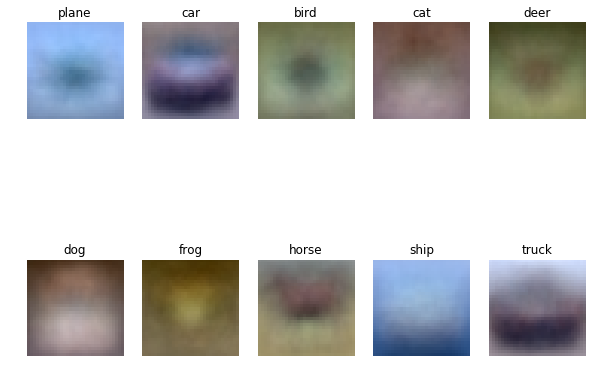

In [12]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])